In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [103]:
# Readig Data
data = pd.read_csv("C:\\Benion\\Benion Programmings\\Python\\AI & ML\\data\\tree-diameter-height.csv")
data.shape

(450, 3)

In [104]:
data.head(10)

,S/N,Height,Diameter
0,1,16.199683,43.514815
1,2,20.832644,9.981329
2,3,0.488141,10.561674
3,4,22.710793,3.966893
4,5,7.883484,39.131736
5,6,10.585037,8.313417
6,7,3.997367,6.735644
7,8,20.572101,45.635678
8,9,4.568331,6.560634
9,10,22.774925,9.151818


In [105]:
# Declaring Dependent and Independent Variables
X = data["Height"].values.reshape(-1, 1)
y = data["Diameter"].values.reshape(-1, 1)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Implement the Support Vector Machine --> Support Vector Regressor and fit the data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Implement the Linear Regression
svr_model = SVR(kernel="rbf")
svr_model.fit(X_train, y_train)

# Make Prediction
lr_predictions = lr_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)

C:\Users\benion\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
data_frame = pd.DataFrame({"Actual(y)": y_test.flatten(), "LR-Predicted(y)": lr_predictions.flatten(), "SVR-Predicted(y)": svr_predictions.flatten()})
data_frame

,Actual(y),LR-Predicted(y),SVR-Predicted(y)
0,2.723447,23.282798,24.478231
1,7.897541,23.092198,24.472855
2,18.023670,23.088751,24.469457
3,21.813627,23.268733,24.487138
4,27.055545,21.692117,21.032140
...,...,...,...
85,20.803021,22.759916,23.453356
86,34.320501,23.820513,24.141997
87,20.314663,21.483185,20.944784
88,19.856327,22.170413,21.260516


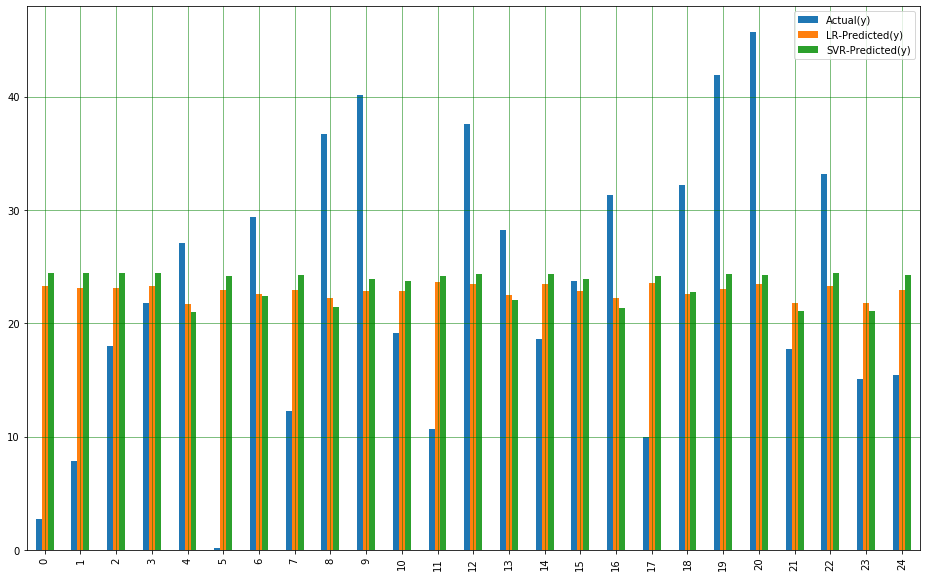

In [107]:
# Bar Graph
data_frame = pd.DataFrame({"Actual(y)": y_test.flatten(), "LR-Predicted(y)": lr_predictions.flatten(), "SVR-Predicted(y)": svr_predictions.flatten()})
data_frame_graph = data_frame.head(25)
data_frame_graph.plot(kind="bar", figsize=(16, 10))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="red")
plt.show()

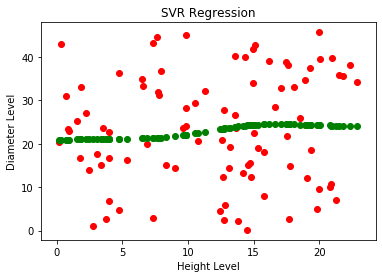

In [108]:
# SVR Plot
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test.reshape(-1), color="red")
plt.scatter(X_test, svr_predictions, color="green")
plt.title("SVR Regression")
plt.xlabel("Height Level")
plt.ylabel("Diameter Level")
plt.show()

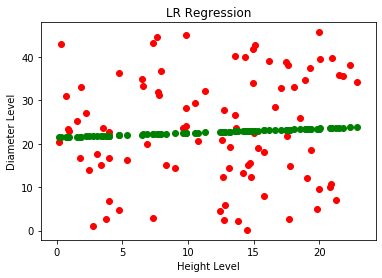

In [109]:
# LR Plot
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test.reshape(-1), color="red")
plt.scatter(X_test, lr_predictions, color="green")
plt.title("LR Regression")
plt.xlabel("Height Level")
plt.ylabel("Diameter Level")
plt.show()

In [110]:
# SVR
svr_mean_absolute_error = mean_absolute_error(y_test, svr_predictions)
svr_mean_squared_error = mean_squared_error(y_test, svr_predictions)
svr_root_mean_squared_error = np.sqrt(svr_mean_squared_error)
svr_r2_score = svr_model.score(X_train, y_train)
print(f"Mean Absolute Error: {svr_mean_absolute_error}")
print(f"Mean Squared Error: {svr_mean_squared_error}")
print(f"Root Mean Squared Error: {svr_root_mean_squared_error}")
print(f"r^2 Score: {svr_r2_score} -- ({svr_r2_score * 100})%")

Mean Absolute Error: 10.844812438429763
Mean Squared Error: 159.90534309448847
Root Mean Squared Error: 12.645368444394512
r^2 Score: 0.0007705955945490617 -- (0.07705955945490617)%


In [111]:
# LR
lr_mean_absolute_error = mean_absolute_error(y_test, lr_predictions)
lr_mean_squared_error = mean_squared_error(y_test, lr_predictions)
lr_root_mean_squared_error = np.sqrt(lr_mean_squared_error)
lr_r2_score = lr_model.score(X_train, y_train)
print(f"Mean Absolute Error: {lr_mean_absolute_error}")
print(f"Mean Squared Error: {lr_mean_squared_error}")
print(f"Root Mean Squared Error: {lr_root_mean_squared_error}")
print(f"r^2 Score: {lr_r2_score} -- ({lr_r2_score * 100})%")

Mean Absolute Error: 10.76205518425184
Mean Squared Error: 158.16089408410457
Root Mean Squared Error: 12.57620348452205
r^2 Score: 0.0028348693460952257 -- (0.28348693460952257)%
